# Estudo sobre o Vestibular Univesp

Olá amigos, tudo bem? 

Como falei há alguns dias atrás aqui, estou buscando cursos de formação na área de Ciência de Dados para me especializar no tema. Buscando na internet algumas opções, fiquei sabendo sobre a [**UNIVESP (Universidade Virtual do Estado de São Paulo).**](http://vestibular.univesp.br/)

Nesse ano, casualmente, a universidade abriu processo seletivo para o vestibular em [***Bacharelado em Ciência de Dados***](https://univesp.br/cursos/bacharel-em-ciencia-de-dados). De acordo com a grade curricular, o curso inicia com conteúdos de cálculo básico e avança até a teoria estatística para o desenvolvimento de modelos.

Fiquei muito curioso a respeito do curso. Embora a duração do curso seja quatro anos (tradicional de um curso de bacharelado), um pouco mais longo que havia me planejado, achei que poderia ser algo interessante para uma formação ainda mais solidificada. 

Por isso decidi me inscrever. [A prova ocorreu no dia 01/12/19](https://univesp.br/noticias/prova-do-vestibular-univesp-2020-acontece-neste-domingo-01-slash-12#.Xe-k7JNKh48), e como todo vestibular convencional, o exame será constituído de duas partes: redação e prova com 56 (cinquenta e seis) questões, cada uma com 5 (cinco) alternativas (A, B, C, D e E), das disciplinas de Matemática, Português e Literatura Brasileira, Inglês, História, Geografia, Química, Biologia e Física.

Ainda que eu tenha dificuldades severas com conteúdos de química e biologia, decidi arriscar focando apenas em física e matemática (minhas paixões). Português foi aquela revisão geral básica, mas principalmente, decidi focar na redação.

De acordo com o gabarito oficial, eu acertei aproximadamente 68% da prova. É, pois é, poderia ter ido melhor, mas considerando o tempo que tive para me preparar, confesso que fiquei até feliz com o resultado. Com base a algumas informações disponíveis no site  da UNIVESP e na minha porcentagem de acerto, vou tentar identificar a "probabilidade" de eu passar ou não no concurso. 

O estudo completo pode ser encontrado em: xyz

Primeiro, vamos importar algumas bibliotecas.

In [37]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import googlemaps
import mplleaflet

No site oficial do vestibular é possível encontrar a [lista de inscrições homologadas.](http://vestibular.univesp.br/3nGhChKn3_Homologados/). Usando o json, vou trazer os dados como um DataFrame.

In [38]:
url = "http://vestibular.univesp.br/3nGhChKn3_Homologados/db/UNIVESP-homologados.json?_=1575523516238"
data = requests.get(url)
datastore = data.json()
univesp_homologados = pd.DataFrame(datastore["RECORDS"])
univesp_homologados.head()

,Eixo,Inscricao,Nome,Polo_1
0,EIXO DE LICENCIATURA,1091597-9,...CLAUDENILSON EUZEBIO DE SOUZA,LIMEIRA
1,EIXO DE COMPUTAÇÃO,1126620-1,06004835331,BRODOWSKI
2,EIXO DE LICENCIATURA,1106360-8,07346793609,AREALVA
3,EIXO DE COMPUTAÇÃO,1090166-7,08557666977,EMBU DAS ARTES
4,EIXO DE COMPUTAÇÃO,1007706-6,11462904629,JAGUARIÚNA


O DataFrame conta com quatro colunas
1. **'Eixo'** - Qual curso
1. **'Inscricao'** - Número do inscrito
1. **'Nome'** - Nome do candidato
1. **'Polo_1'** - Polo onde há vagas

In [39]:
univesp_homologados.shape

(49500, 4)

Sendo assim podemos ver que houve 49.500 inscritos no vestibular. Considerando que minha inscrição foi para o eixo de computação, vou filtrar apenas esses candidatos.

In [40]:
candidatos = univesp_homologados[univesp_homologados['Eixo'] == 'EIXO DE COMPUTAÇÃO']
candidatos = candidatos.reset_index(drop=True)
candidatos.shape

(19457, 4)

Sendo assim podemos ver que houve 49.500 inscritos no vestibular para computação, mas no primeiro plot do DataFrame me chamou atenção que há candidatos que preencheram no campo nome algum número (imagino que deva ser um CPF). Isso me despertou a vontade de ver a distribuição de quantidade de nomes por candidatos.

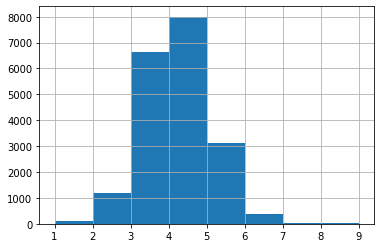

In [41]:
candidatos['Nome'].str.split().apply(len).hist(bins=8)

É possível perceber que temos aproximadamente 110 nomes com apenas 1 palavra. Essas inscrições podemos considerar como inválidas para a análise. Vamos removê-las.

In [42]:
def f(x):    return len(x.split())
candidatos = candidatos[candidatos['Nome'].apply(f) > 1].sort_values(by=['Nome'])
candidatos.shape

(19348, 4)

Podemos ver agora que para o eixo computação, há mais de 19mil inscritos. <br>
Vamos analisar a quantidade de inscritos vs. quantidade de vagas. Para isso, inicialmente vou criar um novo dataframe e contar quantos inscritos houveram por polo.

In [43]:
candidatos_polo = candidatos.groupby('Polo_1').count().reset_index()
candidatos_polo = candidatos_polo[['Polo_1', 'Eixo']]
candidatos_polo.columns = ['POLO', 'INSCRITOS']
candidatos_polo.head()

,POLO,INSCRITOS
0,ADAMANTINA,23
1,AGUAÍ,22
2,AGUDOS,25
3,ALTINÓPOLIS,17
4,ALUMÍNIO,42


Isso feito, vamos buscar do arquivo `polos.csv` as informações de ['POLO', 'CIDADE', 'ENDEREÇO', 'NUMERO', 'BAIRRO', 'CEP', 'VAGAS']. <br>
Essas informações foram adquiridas através de um **crawler**, que pode ser encontrado nesse projeto.

In [44]:
polos = pd.read_csv('data/polos.csv').drop(['Unnamed: 0'], axis=1)
polos['polo'] = polos['polo'].str.upper()
polos.head()

,polo,vagas,endereco,lat,lng,distance
0,ADAMANTINA,10,"Alameda dos Expedicionários, 864 - Centro CEP:...",-21.684933,-51.078594,576702.0
1,AGUAÍ,10,"Av. Olinda Silveira Cruz Braga, 200 - Parque I...",-22.059098,-46.982530,189028.0
2,AGUDOS,10,"R. João Pessoa, 2 - Professor Simões CEP: 1712...",-7.119496,-34.845012,2786649.0
3,ALTINÓPOLIS,10,"R. Alagoas, 248 - Vila Maria CEP: 14350-000",-21.019556,-47.374682,327717.0
4,ALUMÍNIO,10,"Av. Senador José Ermírio de Moraes, 798 - Vila...",-23.532909,-47.255018,78107.0


Agora que temos as informaçõe das vagas em cada polo e das inscrições em cada polo, podemos juntar ambos dataframes e depois calcular a razão.

In [45]:
cand_vaga = pd.merge(polos, candidatos_polo, how="outer", right_on="POLO", left_on='polo').drop(['POLO'], axis=1)
cand_vaga['CAN_X_VAG'] = cand_vaga['INSCRITOS']/cand_vaga['vagas']
cand_vaga = cand_vaga.dropna()
cand_vaga.head(5)

,polo,vagas,endereco,lat,lng,distance,INSCRITOS,CAN_X_VAG
0,ADAMANTINA,10.0,"Alameda dos Expedicionários, 864 - Centro CEP:...",-21.684933,-51.078594,576702.0,23.0,2.3
1,AGUAÍ,10.0,"Av. Olinda Silveira Cruz Braga, 200 - Parque I...",-22.059098,-46.982530,189028.0,22.0,2.2
2,AGUDOS,10.0,"R. João Pessoa, 2 - Professor Simões CEP: 1712...",-7.119496,-34.845012,2786649.0,25.0,2.5
3,ALTINÓPOLIS,10.0,"R. Alagoas, 248 - Vila Maria CEP: 14350-000",-21.019556,-47.374682,327717.0,17.0,1.7
4,ALUMÍNIO,10.0,"Av. Senador José Ermírio de Moraes, 798 - Vila...",-23.532909,-47.255018,78107.0,42.0,4.2


In [47]:
cand_vaga[['polo', 'vagas', 'INSCRITOS','CAN_X_VAG']].sort_values(['CAN_X_VAG'], ascending =True).set_index('polo').to_csv('CAN_X_VAG.csv')

In [11]:
19348

19348

Isto posto, para mim o que realmente importa são os inscritos para os polos da cidade de São Paulo, por isso farei um filtro apenas para esses.

In [12]:
filter_sao_paulo = cand_vaga['polo'].str.contains('SÃO PAULO')
cand_vaga_sp = cand_vaga[filter_sao_paulo].sort_values(by=['polo'], ascending=True)
cand_vaga_sp = cand_vaga_sp.reset_index(drop=True)
cand_vaga_sp.sample(5)

,polo,vagas,endereco,lat,lng,distance,INSCRITOS,CAN_X_VAG
33,SÃO PAULO - QUINTA DO SOL,35.0,"Av. Luiz Imparato, 564 - Vila Cisper CEP: 0381...",-23.498780,-46.496117,24062.0,84.0,2.400000
43,SÃO PAULO - VILA CURUÇÁ,35.0,"Av. Marechal Tito, 3452 - Jardim Miragaia CEP:...",-23.495035,-46.412296,35776.0,155.0,4.428571
20,SÃO PAULO - JAÇANÃ,35.0,"R. Francisca Espósito Tonetti, 105 - Jardim Gu...",-23.457082,-46.584542,24648.0,223.0,6.371429
39,SÃO PAULO - TRÊS LAGOS,35.0,"R. Maria Moura da Conceição, S/N - Jardim Belc...",-23.767204,-46.678547,33324.0,45.0,1.285714
32,SÃO PAULO - PQ. ANHANGUERA,35.0,"R. Pedro José de Lima, 1020 - Jd Anhanguera CE...",-23.439784,-46.787138,28319.0,44.0,1.257143


Como é possível perceber o Campus Butantã é o onde mais houve inscritos, aproximadamente 12 candidatos por vaga.<br>
[Com base ao site da UNIVESP](https://univesp.br/noticias/univesp-divulga-numeros-do-vestibular-2019-dot-2#.Xe8Qc5NKh48), houve no último vestibular uma média de 29% de abstenção no concurso. Vamos adicionar essa informação ao nosso DF.

In [13]:
cand_vaga_sp['ABST'] = cand_vaga_sp['CAN_X_VAG'] * (1-0.29)
cand_vaga_sp.head()

,polo,vagas,endereco,lat,lng,distance,INSCRITOS,CAN_X_VAG,ABST
0,SÃO PAULO - ALTO ALEGRE,35.0,"R. Bento Guelfi, 1802 - Jd Laranjeira CEP: 083...",-23.610484,-46.426306,33718.0,26.0,0.742857,0.527429
1,SÃO PAULO - ALVARENGA,35.0,"Estrada do Alvarenga, 3752 - Balneário São Fra...",-23.704771,-46.644013,28880.0,85.0,2.428571,1.724286
2,SÃO PAULO - ARICANDUVA,35.0,"R. Olga Fadel Abarca, S/N - Jardim Santa Terez...",-23.572590,-46.503096,24174.0,283.0,8.085714,5.740857
3,SÃO PAULO - AZUL DA COR DO MAR,35.0,"Av. Ernesto Souza Cruz, 2171 - Cidade Antonio ...",-23.521495,-46.456675,33639.0,59.0,1.685714,1.196857
4,SÃO PAULO - BUTANTÃ,35.0,"R. Engenheiro Heitor Antônio Eiras Garcia, 187...",-23.582657,-46.749982,12021.0,427.0,12.200000,8.662000


Assim, podemos ver que a média real de concorrentes para a vaga são de 8 pessoas. <br>
Eu quero ver agora qual dos polos é mais próximo de minha casa e, também, qual deles tem menor candidato/vaga.

In [14]:
cand_vaga_sp.sort_values(['distance']).head().sort_values(['ABST'])

,polo,vagas,endereco,lat,lng,distance,INSCRITOS,CAN_X_VAG,ABST
19,SÃO PAULO - JARDIM PAULISTANO,35.0,"R. Aparecida do Taboado, S/N - Jardim Paulista...",-23.458829,-46.707145,13020.0,92.0,2.628571,1.866286
17,SÃO PAULO - JAGUARÉ,35.0,"Av. Keikiti Simomoto, 80 - Jaguaré CEP: 05347-010",-23.550436,-46.741959,8905.0,148.0,4.228571,3.002286
38,SÃO PAULO - TIQUATIRA,35.0,"Av. Condessa Elisabeth de Robiano, S/N - Penha...",-23.527020,-46.564581,14282.0,183.0,5.228571,3.712286
13,SÃO PAULO - FREGUESIA DO Ó,35.0,"Av. Deputado Emílio Carlos, 3871 - Limão CEP: ...",-23.475105,-46.668977,8494.0,297.0,8.485714,6.024857
4,SÃO PAULO - BUTANTÃ,35.0,"R. Engenheiro Heitor Antônio Eiras Garcia, 187...",-23.582657,-46.749982,12021.0,427.0,12.200000,8.662000


Sendo assim,teria feito mais sentido ter me inscrito como primeira e segunda opção os polos:
1. SÃO PAULO - JARDIM PAULISTANO - Próximo de casa e aproximadamente 2 candidatos/vaga
1. SÃO PAULO - JAGUARÉ - Próximo de casa e aproximadamente 3 candidatos/vaga

Agora, com base nos endereços de cada Polo em SP eu quero saber os que fariam mais sentido para eu me inscrever. Considerando os polos mais próximos de casa e com menos concorrência.

In [36]:
plt.figure(figsize=(8,8))

lat1 = cand_vaga_sp.sort_values(by=['distance'])['lat'].to_list()
lng1 = cand_vaga_sp.sort_values(by=['distance'])['lng'].to_list()
plt.scatter(lng1[:10], lat1[:10], c='g', alpha=0.99, s=200)
plt.scatter(lng1[10:], lat1[10:], c='r', alpha=0.7, s=200)

lat2 = cand_vaga_sp.sort_values(by=['ABST'])['lat'].to_list()
lng2 = cand_vaga_sp.sort_values(by=['ABST'])['lng'].to_list()
plt.scatter(lng2[:10], lat2[:10], c='y')
plt.scatter(lng2[10:], lat2[10:], c='b')

lat3 = cand_vaga_sp[cand_vaga_sp['polo']=='SÃO PAULO - JARDIM PAULISTANO']['lat'].to_list()
lng3 = cand_vaga_sp[cand_vaga_sp['polo']=='SÃO PAULO - JARDIM PAULISTANO']['lng'].to_list()
lat4 = cand_vaga_sp[cand_vaga_sp['polo']=='SÃO PAULO - JAGUARÉ']['lat'].to_list()
lng4 = cand_vaga_sp[cand_vaga_sp['polo']=='SÃO PAULO - JAGUARÉ']['lng'].to_list()
plt.scatter(lng3, lat3, c='white')
plt.scatter(lng4, lat4, c='white')

plt.scatter(-46.6769765, -23.53945, c='b', alpha=0.7, s=200)
mplleaflet.display()